In [1]:
# Vipin/Teo
import os
#os.chdir("/storage/projects/BGR Soil")
os.chdir("../../../")
!pwd

/mnt/KInsektDaten/teo


### Load Data

In [2]:

import pandas as pd
import matplotlib.pylab as plt
import numpy as np

pd.set_option("display.max_columns", None)
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

path_csv = "../data/BGR/data_horizons.csv"
path_csv_annotator_ids = '../data/BGR/Kartierer_ID.csv'
path_csv_locations = '../data/BGR/STANDORT.csv'
path_horizons_simple = '../data/BGR/Vereinfachung_Horizontsymbole.csv'
path_color = '../data/BGR/Munsell2RGB_Boden.csv'
path_pictures = "../data/BGR/Profilbilder_no_ruler_no_sky/"

In [3]:
df = pd.read_csv(path_csv)
df = df.dropna(subset=['Horizontsymbol'])

In [4]:
# Read image dataset and add file path as extra column to df
image_dataset = os.listdir(path_pictures)
img_files = pd.DataFrame(image_dataset, columns=['file'])
img_files['Point'] = img_files['file'].str.split("_").map(lambda x: x[1]).astype(float)
df = pd.merge(df, img_files, how='inner', on='Point')
df['file'] = df['file'].map(lambda x: os.path.join(path_pictures, x))

In [5]:
#df_k = pd.read_csv(path_csv_annotator_ids)
#df_k = df_k.rename({'PointID':'Point'},axis=1)

# Join with table containing geographical infos
df_loc = pd.read_csv(path_csv_locations, encoding='unicode_escape')
df_loc = df_loc.rename({'PointID':'Point'},axis=1)

In [6]:
# There are some string artifacts when reading the Standort dataframe. Set them to NaN and remove the rows
df_loc['Point'] = pd.to_numeric(df_loc['Point'], errors='coerce')
df_loc = df_loc.dropna(subset=['Point'])
df = pd.merge(df, df_loc, how='inner', on='Point')

In [7]:
# Decide on which columns to keep for training
keep_columns = ['Point', #'HorizontID',
                'Obergrenze', 'Untergrenze',
                #'Horizontsymbol',
                #'Horizontsymbol_relevant',
                #'Horizont_cluster',
                'Bodenart', 'Bodenfarbe', 'Steine', 'Karbonat', 'Humusgehaltsklasse', 'Durchwurzelung',
                #'max_depth', # not needed for training (and also has mostly NaNs)
                'file',
                #'Aufnehmer', # only when merged with annotators
                'Probenahme_Monat', 'Probenahme_Jahr', 'xcoord', 'ycoord', 'Bodenklimaraum_Name',
                'Landnutzung', 'BZE_Moor', 'Hauptbodentyp',
                #'BodenVarTypSub', # extremely fine grained (> 900 classes) - it offers further specifications of the 'Hauptbodentyp'
                'GrundwaStufe', 'GrundwaStand', 'Moormaechtigkeit',
                'Torfmaechtigkeit', 'Neigung', 'Exposition', 'Woelbung', 'Reliefformtyp', 'LageImRelief', 'KV_0_30', 'KV_30_100']
df = df[keep_columns]
df['GrundwaStand'] = df['GrundwaStand'].str.replace('>','').astype(float)
df['ycoord'] = df['ycoord'].astype(float)
df

,Point,Obergrenze,Untergrenze,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,file,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
0,2.0,0.0,28.0,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19
1,2.0,28.0,54.0,Sl2,10YR 3/3,3.0,C0,h2,Wf3,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19
2,2.0,54.0,68.0,Sl2,7.5YR 4/3,10.0,C0,h1,Wf3,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19
3,2.0,68.0,96.0,fSms,7.5YR 6/4,1.0,C0,h0,Wf2,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19
4,2.0,96.0,201.0,mSfs,10YR 7/4,1.0,C0,h0,NaN,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,6211.0,70.0,100.0,fSms,7.5YR 5/4,1.0,C0,h1,Wf6,../data/BGR/Profilbilder_no_ruler_no_sky/NI_62...,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72
16312,6211.0,100.0,130.0,fSms,2.5Y 6/4,1.0,C0,h0,Wf4,../data/BGR/Profilbilder_no_ruler_no_sky/NI_62...,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72
16313,6211.0,100.0,130.0,fSms,2.5Y 6/4,1.0,C0,h0,Wf4,../data/BGR/Profilbilder_no_ruler_no_sky/NI_62...,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72
16314,6211.0,130.0,155.0,fSms,2.5Y 5/4,1.0,C0,h0,Wf2,../data/BGR/Profilbilder_no_ruler_no_sky/NI_62...,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72


### Simplify Bodenart

In [8]:
df['Bodenart'].unique()

array(['Sl2', 'fSms', 'mSfs', 'Ls3', 'Ls2', 'Ls4', 'Lu', 'Su3', 'Tu3',
       'Tu4', nan, 'Su2', 'mS', 'mSgs', 'Lt2', 'Ut4', 'Hn', 'Sl4', 'fS',
       'Sl3', 'Hnp', 'Hnr', 'Ha', 'Slu', 'Uls', 'Ut3', 'Ut2', 'Tu2',
       'Lt3', 'Lts', 'Tt', 'Us', 'Su4', 'Fhh', 'Hh', 'Ts3', 'Fms', 'Fh',
       'Ts4', 'Ts2', 'St2', 'gS', 'Tl', 'Hhs', 'Fm', 'fSgs', 'Hnle',
       'Fmt', 'St3', 'Fmk', 'Fmu', 'Hu', 'Fhg', 'Ss', 'Uu', 'k', 'z', 'v',
       'Hulb'], dtype=object)

In [9]:
df['Bodenart'].isna().sum()

60

In [10]:
len(df['Bodenart'].unique())

59

In [11]:
df['Bodenart'].value_counts()

Bodenart
Lu      1036
Tu3      992
Su2      915
Sl2      728
Sl3      694
fSms     693
mSfs     690
Ut3      684
Lt2      677
Ls3      616
Sl4      604
fS       580
Ut4      580
Ut2      551
Ls2      542
Tu2      540
Uls      499
Ls4      490
Tu4      470
Lt3      439
Su3      394
Slu      386
Lts      380
mSgs     295
Hn       251
mS       197
Us       154
Tl       143
gS       137
Su4      135
Tt       126
St3       87
St2       82
Ts3       77
Hh        61
Uu        59
Ts4       47
Ts2       46
Ha        36
Hnr       27
Ss        25
Fmu       18
fSgs      12
Hu         9
Hnp        8
Fmt        7
Fh         7
Fmk        6
Hnle       5
Fhh        4
Fms        4
k          3
Hhs        2
z          2
Fm         1
Fhg        1
v          1
Hulb       1
Name: count, dtype: int64

In [25]:
# Summarize the main soil types
mapping_main = {
    "Uls": "lu",
    "Ss": "ss",
    "fSgs": "ss",
    "fS": "ss",
    "fSms": "ss",
    "mSfs": "ss",
    "mS": "ss",
    "mSgs": "ss",
    "gS": "ss",
    "Su2": "ls",
    "Su3": "us",
    "Su4": "us",
    "Slu": "sl",
    "Sl2": "ls",
    "Sl3": "ls",
    "Sl4": "sl",
    "St2": "ls",
    "St3": "sl",
    "Uu": "su",
    "Us": "su",
    "Ut2": "lu",
    "Ut3": "lu",
    "Ut4": "tu",
    "Ls2": "ll",
    "Ls3": "ll",
    "Ls4": "ll",
    "Lu": "tu",
    "Lt2": "ll",
    "Lt3": "ut",
    "Lts": "tl",
    "Ts2": "lt",
    "Ts3": "tl",
    "Ts4": "tl",
    "Tu4": "ut",
    "Tu3": "ut",
    "Tu2": "lt",
    "Tl": "lt",
    "Tt": "lt",
    "fSu2": "ls",
    "fSu3": "us",
    "fSu4": "us",
    "fSlu": "sl",
    "fSl2": "ls",
    "fSl3": "ls",
    "fSl4": "sl",
    "fSt2": "ls",
    "fSt3": "sl",
    "mSu2": "ls",
    "mSu3": "us",
    "mSu4": "us",
    "mSlu": "sl",
    "mSl2": "ls",
    "mSl3": "ls",
    "mSl4": "sl",
    "mSt2": "ls",
    "mSt3": "sl",
    "gSu2": "ls",
    "gSu3": "us",
    "gSu4": "us",
    "gSlu": "sl",
    "gSl2": "ls",
    "gSl3": "ls",
    "gSl4": "sl",
    "gSt2": "ls",
    "gSt3": "sl"
}

In [13]:
# Summarize the F-class
mapping_f = {
    "Fmt": "Fm",
    "Fmu": "Fm",
    "Fm": "Fm",
    "Fms": "Fm",
    "Fh": "Fh",
    "Fhl": "Fh",
    "Fhh": "Fh",
    "Fhg": "Fh",
    "F": "F",
    "Fmk": "Fm",
    "Fmi": "Fm"
}

In [14]:
# Summarize the H-class
mapping_h = {
    "H": "H",
    "Ha": "Ha",
    "Hh": "Hh",
    "Hha": "Hh",
    "Hhe": "Hh",
    "Hhi": "Hh",
    "Hhk": "Hh",
    "Hhs": "Hh",
    "Hhsa": "Hh",
    "Hhsu": "Hh",
    "Hhsy": "Hh",
    "Hn": "Hn",
    "Hnb": "Hn",
    "Hnd": "Hn",
    "Hnle": "Hn",
    "Hnmy": "Hn",
    "Hnp": "Hn",
    "Hnq": "Hn",
    "Hnr": "Hn",
    "Hu": "Hu",
    "Hulb": "Hu",
    "Hulk": "Hu"
}

In [15]:
# Summarize rare soil types (classified according to extra finer grained rules)
# Rule: replace them with the soil type in the horizon above them. They are thin and at the bottom anyway.
mapping_rare = {'k': 'ls', 'z': 'll', 'v': 'tl'}

In [16]:
df['Bodenart'] = df['Bodenart'].replace(mapping_main).replace(mapping_f).replace(mapping_h).replace(mapping_rare)

In [17]:
df['Bodenart'].value_counts()

Bodenart
ss    2629
ls    2422
ll    2327
ut    1901
lu    1734
tu    1616
sl    1077
lt     855
us     529
tl     505
Hn     291
su     213
Hh      63
Fm      36
Ha      36
Fh      12
Hu      10
Name: count, dtype: int64

### Simplify Bodenfarbe

In [8]:
df['Bodenfarbe'].unique()

array(['7.5YR 3/2', '10YR 3/3', '7.5YR 4/3', '7.5YR 6/4', '10YR 7/4',
       '10YR 4/2', '2.5Y 5/1', '5Y 5/1', 'GLEY1 4/5GY', '5Y 5/2',
       '5Y 6/1', 'GLEY1 5/N', '10YR 3/1', '10YR 4/1', '10YR 2/1',
       '7.5YR 2.5/1', '10YR 6/1', '5YR 3/2', '5YR 4/3', '5YR 3/3',
       '10YR 6/2', '10YR 6/6', '2.5Y 6/1', '10YR 3/2', '2.5Y 5/4',
       '2.5Y 3/2', '2.5Y 5/2', '5Y 3/1', '7.5YR 3/1', '5YR 2.5/1',
       '7.5YR 4/6', '10YR 4/4', '10YR 3/4', '5YR 3/4', '10YR 5/6',
       '2.5YR 5/4', '5Y 4/1', '7.5YR 5/3', '2.5Y 4/2', '7.5YR 4/1',
       '10YR 6/4', '10YR 4/3', '2.5Y 3/1', '2.5Y 4/1', '10YR 2/2',
       '7.5YR 2.5/3', '2.5Y 5/3', '10YR 5/3', '10YR 6/3', '10YR 5/2',
       '7.5YR 4/2', '5YR 7/6', '7.5YR 5/6', '2.5YR 4/6', '2.5YR 4/2',
       '2.5Y 6/2', '5Y 3/2', '10YR 5/4', nan, '2.5Y 6/3', '2.5Y 6/4',
       '2.5Y 7/3', '2.5Y 7/4', '2.5Y 4/4', '10YR 4/6', 'GLEY2 5/5B',
       '7.5YR 4/4', '10YR 7/6', '5YR 3/1', '10YR 7/3', '7.5YR 3/3',
       '7.5YR 5/4', '2.5Y 7/2', '5Y 7/2', 'GLEY1

In [9]:
df['Bodenfarbe'].isna().sum()

112

In [11]:
len(df['Bodenfarbe'].unique())

255

In [12]:
df['Bodenfarbe'].value_counts()

Bodenfarbe
10YR 3/3            1153
10YR 4/3             983
10YR 3/2             955
10YR 5/4             943
10YR 4/4             790
                    ... 
2.5YR 4/8              1
5Y 4/4                 1
5Y 8/3                 1
GLEY2 5/5B             1
WHITE 10YR 8.5/2       1
Name: count, Length: 254, dtype: int64

#### Look at RGB Conversion

In [8]:
df_color = pd.read_csv(path_color)
df_color = df_color.iloc[:, :6]
df_color.columns = df_color.iloc[0]  # Set the first row as column names
df_color = df_color[1:]  # Remove the first row
df_color.reset_index(drop=True, inplace=True)  # Reset the index
df_color

,Hue,Value,Chroma,R,G,B
0,10YR,8,1,209,199,188
1,10YR,7,1,182,172,162
2,10YR,6,1,156,146,136
3,10YR,5,1,130,120,111
4,10YR,4,1,105,95,87
...,...,...,...,...,...,...
322,5G,6,2,128,153,139
323,5G,5,2,105,127,115
324,5G,4,2,82,101,91
325,5G,3,2,60,77,69


In [9]:
# Create the dictionary to map the Munsell color to RGB
color_dict = {
    f"{row['Hue']} {row['Value']}/{row['Chroma']}": (int(row['R']), int(row['G']), int(row['B']))
    for _, row in df_color.iterrows()
}
color_dict

{'10YR 8/1': (209, 199, 188),
 '10YR 7/1': (182, 172, 162),
 '10YR 6/1': (156, 146, 136),
 '10YR 5/1': (130, 120, 111),
 '10YR 4/1': (105, 95, 87),
 '10YR 3/1': (81, 72, 65),
 '10YR 2/1': (59, 51, 45),
 '10YR 8/2': (217, 198, 175),
 '10YR 7/2': (190, 171, 150),
 '10YR 6/2': (164, 145, 125),
 '10YR 5/2': (137, 119, 101),
 '10YR 4/2': (112, 94, 77),
 '10YR 3/2': (87, 71, 56),
 '10YR 2/2': (64, 50, 38),
 '10YR 8/3': (220, 197, 164),
 '10YR 7/3': (193, 170, 139),
 '10YR 6/3': (166, 144, 114),
 '10YR 5/3': (140, 118, 91),
 '10YR 4/3': (115, 93, 67),
 '10YR 3/3': (89, 70, 48),
 '10YR 2/3': (66, 49, 30),
 '10YR 8/4': (226, 196, 152),
 '10YR 7/4': (198, 169, 127),
 '10YR 6/4': (171, 143, 104),
 '10YR 5/4': (145, 117, 80),
 '10YR 4/4': (119, 92, 57),
 '10YR 3/4': (93, 69, 39),
 '10YR 8/6': (236, 194, 129),
 '10YR 7/6': (208, 167, 104),
 '10YR 6/6': (181, 141, 81),
 '10YR 5/6': (154, 115, 57),
 '10YR 4/6': (126, 90, 37),
 '10YR 3/6': (99, 67, 16),
 '10YR 8/8': (245, 192, 104),
 '10YR 7/8': (216,

In [11]:
# Find unique values in the 'Bodenfarbe' column that are not keys in color_dict
col_not_in_chart = df['Bodenfarbe'].dropna().unique()
col_not_in_chart = [value for value in col_not_in_chart if value not in color_dict]
col_not_in_chart

['GLEY1 4/5GY',
 'GLEY1 5/N',
 'GLEY2 5/5B',
 'GLEY1 3/5GY',
 '7.5R 4/3',
 'GLEY1 6/N',
 '10Y 6/4',
 'GLEY1 7/10Y',
 '7.5R 2.5/1',
 'WHITE 7.5YR 9.5/1',
 'GLEY1 5/10Y',
 'GLEY1 5/5GY',
 'GLEY1 4/N',
 'GLEY1 4/10Y',
 '5R 4/1',
 '5GY 5/2',
 'GLEY1 3/10Y',
 'GLEY1 4/10GY',
 'GLEY1 4/5G_/1',
 '10Y 5/2',
 'GLEY1 2.5/N',
 'GLEY2 4/10G',
 'GLEY1 2.5/10Y',
 'GLEY1 6/10Y',
 '7.5R 3/2',
 'GLEY2 4/5BG',
 'GLEY1 3/10GY',
 'GLEY1 5/10GY',
 'GLEY2 2.5/10G',
 '10Y 3/2',
 'GLEY1 7/N',
 'GLEY1 3/N',
 '10Y 6/2',
 'GLEY1 7/10GY',
 'GLEY2 6/5PB',
 'GLEY1 2.5/5GY',
 'GLEY1 3/5G_/1',
 'GLEY1 5/5G_/2',
 'GLEY1 5/5G_/1',
 '7.5R 5/4',
 '7.5R 5/6',
 '7.5R 6/4',
 '7.5R 3/1',
 '7.5R 2.5/2',
 '7.5R 3/3',
 'GLEY1 6/5GY',
 '7.5R 6/2',
 'GLEY1 6/10GY',
 '7.5R 4/2',
 'GLEY2 5/10BG',
 '7.5R 4/4',
 '7.5R 5/3',
 '7.5R 5/8',
 '7.5R 4/6',
 'GLEY2 3/10B',
 'GLEY1 8/5GY',
 '7.5R 3/4',
 '5R 5/4',
 '10Y 3/4',
 'WHITE 10YR 9/1',
 'GLEY1 7/5GY',
 'GLEY2 6/10B',
 'GLEY2 5/10B',
 'GLEY2 4/5B',
 '10Y 4/2',
 'GLEY2 5/5BG',
 'GLEY2 6

In [13]:
df[df['Bodenfarbe'].isna()]

,Point,Obergrenze,Untergrenze,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,file,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
117,23.0,100.0,201.0,Lt2,NaN,2.0,C0,h0,NaN,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,4,2016,541224.3774,6063998.596,nördliches schleswig-holsteinisches Hügelland,A,0,LL,0,200.0,0.0,0.0,N1,SS,XG,ERL,K,58.99,30.47
650,151.0,170.0,201.0,Su3,NaN,0.0,C3.4,h0,NaN,../data/BGR/Profilbilder_no_ruler_no_sky/SH_01...,9,2016,493894.2868,6000977.137,Niedersächsische Küsten- und Elbmarsch,A,0,ZZ,GWS4,170.0,0.0,0.0,N0,NaN,GG,TSF,T,53.48,49.32
1011,250.0,0.0,10.0,Hn,NaN,0.0,C0,h7,Wf6,../data/BGR/Profilbilder_no_ruler_no_sky/MV_02...,7,2012,793023.0483,5987965.510,mittlere diluviale Böden MV und Uckermark,G,1,KV,GWS3,70.0,83.0,83.0,N0,NaN,XX,TXM,R,314.31,315.03
1012,250.0,10.0,33.0,Hn,NaN,0.0,C0,h7,Wf4,../data/BGR/Profilbilder_no_ruler_no_sky/MV_02...,7,2012,793023.0483,5987965.510,mittlere diluviale Böden MV und Uckermark,G,1,KV,GWS3,70.0,83.0,83.0,N0,NaN,XX,TXM,R,314.31,315.03
1013,250.0,33.0,83.0,Hn,NaN,10.0,C0,h7,Wf1,../data/BGR/Profilbilder_no_ruler_no_sky/MV_02...,7,2012,793023.0483,5987965.510,mittlere diluviale Böden MV und Uckermark,G,1,KV,GWS3,70.0,83.0,83.0,N0,NaN,XX,TXM,R,314.31,315.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16098,6165.0,100.0,120.0,Ls2,NaN,NaN,C0,h0,Wf4,../data/BGR/Profilbilder_no_ruler_no_sky/RP_61...,8,2012,398373.6987,5613593.767,"Hunsrück, Westerwald",A,0,RQ,0,NaN,0.0,0.0,N3.2,EE,XV,H,M,58.09,10.21
16122,6171.0,148.0,149.0,NaN,NaN,0.0,C0,h0,Wf5,../data/BGR/Profilbilder_no_ruler_no_sky/RP_61...,4,2012,336349.0101,5572888.820,Hocheifel / Höhenlagen,G,0,BB,0,NaN,0.0,0.0,N2.2,SS,XX,KSF,R,66.20,15.67
16192,6185.0,100.0,201.0,Uls,NaN,0.0,C4,h0,Wf3,../data/BGR/Profilbilder_no_ruler_no_sky/RP_61...,12,2011,444830.5178,5526265.776,Rheinebene und Nebentäler,A,0,TC,0,200.0,0.0,0.0,N2,NE,GX,H,R,62.01,71.88
16193,6185.0,100.0,201.0,Uls,NaN,0.0,C4,h0,Wf3,../data/BGR/Profilbilder_no_ruler_no_sky/RP_61...,12,2011,444830.5178,5526265.776,Rheinebene und Nebentäler,A,0,TC,0,200.0,0.0,0.0,N2,NE,GX,H,R,62.01,71.88


In [ ]:
# Replace Munsell values in column 'Bodenfarbe' with RGB values
df['RGB'] = df['Bodenfarbe'].map(color_dict)

# Drop rows where RGB mapping failed (if any)
df = df.dropna(subset=['RGB'])

# Create a DataFrame for RGB values
rgb_df = pd.DataFrame(df['RGB'].tolist(), columns=['R', 'G', 'B'])

# Add the RGB values back to the original DataFrame
df[['R', 'G', 'B']] = rgb_df
df.head()

/tmp/ipykernel_2459763/2382373326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['R', 'G', 'B']] = rgb_df
/tmp/ipykernel_2459763/2382373326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['R', 'G', 'B']] = rgb_df
/tmp/ipykernel_2459763/2382373326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Point,Obergrenze,Untergrenze,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,file,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100,RGB,R,G,B
0,2.0,0.0,28.0,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19,"(89, 70, 58)",89.0,70.0,58.0
1,2.0,28.0,54.0,Sl2,10YR 3/3,3.0,C0,h2,Wf3,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19,"(89, 70, 48)",89.0,70.0,48.0
2,2.0,54.0,68.0,Sl2,7.5YR 4/3,10.0,C0,h1,Wf3,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19,"(119, 91, 70)",119.0,91.0,70.0
3,2.0,68.0,96.0,fSms,7.5YR 6/4,1.0,C0,h0,Wf2,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19,"(180, 140, 110)",180.0,140.0,110.0
4,2.0,96.0,201.0,mSfs,10YR 7/4,1.0,C0,h0,NaN,../data/BGR/Profilbilder_no_ruler_no_sky/SH_00...,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19,"(198, 169, 127)",198.0,169.0,127.0


In [ ]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(
    df, x='R', y='G', z='B',
    color=df['RGB'].apply(lambda rgb: f"rgb{rgb}"),  # Map RGB values to colors
    title='3D Visualization of RGB Values from Bodenfarbe',
    labels={'x': 'Red (R)', 'y': 'Green (G)', 'z': 'Blue (B)'}
)
fig.show()

#### Average over Mussel-Value (Saturation)

In [8]:
# Some GLEY values have inconsistent Munsell notation. Fix them.
df['Bodenfarbe'] = df['Bodenfarbe'].str.replace(r'_/1|_/2', '', regex=True)

In [ ]:
# Remove the number in front of the slash '/', only keep Chroma
df['Bodenfarbe'] = df['Bodenfarbe'].str.replace(r'\d+(\.\d+)?/', '', regex=True)
df['Bodenfarbe']

0        7.5YR 2
1         10YR 3
2        7.5YR 3
3        7.5YR 4
4         10YR 4
          ...   
16311    7.5YR 4
16312     2.5Y 4
16313     2.5Y 4
16314     2.5Y 4
16315     2.5Y 4
Name: Bodenfarbe, Length: 16316, dtype: object

In [10]:
df['Bodenfarbe'].unique()

array(['7.5YR 2', '10YR 3', '7.5YR 3', '7.5YR 4', '10YR 4', '10YR 2',
       '2.5Y 1', '5Y 1', 'GLEY1 5GY', '5Y 2', 'GLEY1 N', '10YR 1',
       '7.5YR 1', '5YR 2', '5YR 3', '10YR 6', '2.5Y 4', '2.5Y 2', '5YR 1',
       '7.5YR 6', '5YR 4', '2.5YR 4', '2.5Y 3', '5YR 6', '2.5YR 6',
       '2.5YR 2', nan, 'GLEY2 5B', '2.5Y 6', '7.5R 3', '2.5YR 3', '5Y 3',
       '10YR 8', '10Y 4', '7.5YR 8', 'GLEY1 10Y', '7.5R 1', '2.5YR 1',
       'WHITE 7.5YR 1', '10R 6', '5R 1', '5GY 2', 'GLEY1 10GY',
       'GLEY1 5G', '10Y 2', 'GLEY2 10G', '7.5R 2', 'GLEY2 5BG', '2.5Y 8',
       '10R 2', '5YR 8', 'GLEY2 5PB', '10R 3', '7.5R 4', '7.5R 6', '5Y 4',
       '10R 4', '5Y 6', 'GLEY2 10BG', '10R 8', '2.5YR 8', '7.5R 8',
       'GLEY2 10B', '5R 4', 'WHITE 10YR 1', 'WHITE 10YR 2'], dtype=object)

In [12]:
cols = df['Bodenfarbe'].value_counts()

### Profile Report

In [12]:
# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df.drop('file', axis=1), title="Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.to_csv('../data/all_horizont_data.csv.gzip', compression='gzip')

In [14]:
counts = df['Horizontsymbol'].str.split(';').map(lambda x: x[1]).value_counts()

In [15]:
counts[:30]

Horizontsymbol
Ap       1087
Bv        471
Ah        402
ilCv      393
rAp       363
elCv      312
Gr        307
Sd        255
Ap2       221
Ap1       221
Swd       203
Go        197
M         194
Bt        168
Sw        167
Gor       138
elC       110
eAp       110
lCv        96
Sw-Bv      93
Sdw        88
Al         78
aGr        76
eSd        73
Bv-Sw      73
R-Ap       71
Gro        70
Btv        65
aGo        65
ilC        65
Name: count, dtype: int64

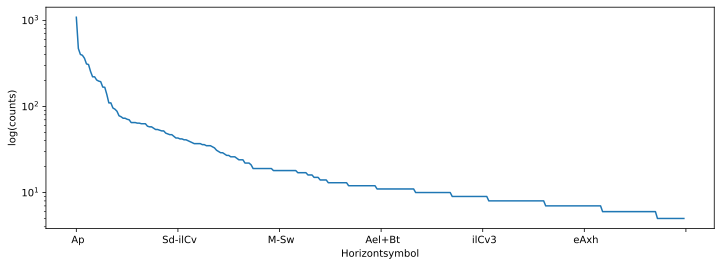

In [16]:
plt.figure(figsize=(12,4))
counts[:300].plot(logy=True);
plt.ylabel('log(counts)');
